参考
- <http://blog.yhat.com/posts/logistic-regression-python-rodeo.html>
- <http://stats.stackexchange.com/questions/203740/logistic-regression-scikit-learn-vs-statsmodels>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
%matplotlib inline

In [201]:
auto = pd.read_csv('auto.csv',encoding = 'gb2312')
auto.head()

,EngSize,Age,Gender,Marital,exp,Owner,vAge,Garage,AntiTFD,import,Loss
0,2.0,56,男,已婚,20,公司,10,有,有防盗装置,进口,0.0
1,1.8,41,男,已婚,20,公司,9,有,无防盗装置,国产,0.0
2,2.0,44,男,未婚,20,公司,8,有,有防盗装置,国产,0.0
3,1.6,56,男,已婚,20,公司,7,有,有防盗装置,国产,0.0
4,1.8,45,男,已婚,20,公司,7,无,无防盗装置,国产,0.0


In [202]:
# 变量取值的转换

auto['LossClass'] = auto['Loss'].map(lambda x: 1 if x > 0 else 0)

OrderedDict([(0,
              {'boxes': [<matplotlib.lines.Line2D at 0x10f788d0>],
               'caps': [<matplotlib.lines.Line2D at 0x14618470>,
               'fliers': [<matplotlib.lines.Line2D at 0x15d89cf8>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x1484c198>],
               'whiskers': [<matplotlib.lines.Line2D at 0x1451f518>,
                <matplotlib.lines.Line2D at 0x11489940>]}),
             (1,
              {'boxes': [<matplotlib.lines.Line2D at 0x159456a0>],
               'caps': [<matplotlib.lines.Line2D at 0x1525b2e8>,
               'fliers': [<matplotlib.lines.Line2D at 0x164244a8>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x16435ba8>],
               'whiskers': [<matplotlib.lines.Line2D at 0x16090eb8>,
                <matplotlib.lines.Line2D at 0x1524f0b8>]})])

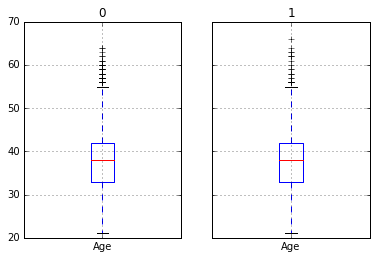

In [236]:
auto.groupby('LossClass').boxplot(column="Age")

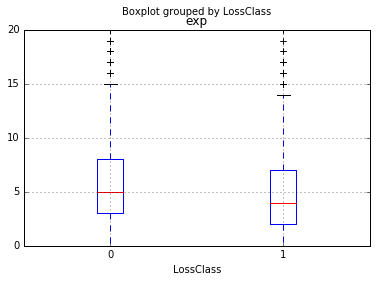

In [238]:
auto.boxplot(column="exp", by = "LossClass")

In [203]:
auto['Gender'] = auto['Gender'].map(lambda x: 'F' if x == u'女'else 'M')
pd.crosstab(auto['LossClass'], auto['Gender'], rownames=['LossClass'])

Gender,F,M
LossClass,,
0,293,2735
1,165,1040


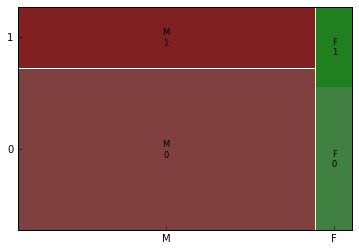

In [205]:
from statsmodels.graphics.mosaicplot import mosaic
import pylab
mosaic(auto,['Gender','LossClass'])
pylab.show()

In [108]:
# 二分类变量的转换
auto['Gender'] = auto['Gender'].map(lambda x: 1 if x == u'女'else 0)

auto['Marital'] = auto['Marital'].map(lambda x: 1 if x == u'已婚' else 0)

auto['Garage'] = auto['Garage'].map(lambda x: 1 if x == u'有'else 0)

auto['AntiTFD'] = auto['AntiTFD'].map(lambda x: 1 if x == u'有防盗装置'else 0)

auto['import'] = auto['import'].map(lambda x: 1 if x == u'进口'else 0)


# 变量取值的转换

auto['vAgeNew'] = auto['vAge'].map(lambda x: 1 if x == 1 else 0)

auto['EngType'] = auto['EngSize'].map(lambda x: 1 if x >1.6 else 0)

auto['Owner'] = auto['Owner'].replace({u'公司':1, u'私人':2, u'政府':3})

auto['Intercept'] = 1.0

# 另一种写法
# auto['Owner'] = auto['Owner'].replace([u'公司', u'私人', u'政府'],[1,2,3])

auto.head()

,EngSize,Age,Gender,Marital,exp,Owner,vAge,Garage,AntiTFD,import,Loss,LossClass,vAgeNew,EngType,Intercept
0,2.0,56,0,1,20,1,10,1,1,1,0.0,0,0,1,1.0
1,1.8,41,0,1,20,1,9,1,0,0,0.0,0,0,1,1.0
2,2.0,44,0,0,20,1,8,1,1,0,0.0,0,0,1,1.0
3,1.6,56,0,1,20,1,7,1,1,0,0.0,0,0,0,1.0
4,1.8,45,0,1,20,1,7,0,0,0,0.0,0,0,1,1.0


In [109]:
owner_ranks = pd.get_dummies(auto['Owner'], prefix='Owner')
owner_ranks.head()

,Owner_1,Owner_2,Owner_3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [110]:
auto.columns

Index([  u'EngSize',       u'Age',    u'Gender',   u'Marital',       u'exp',
           u'Owner',      u'vAge',    u'Garage',   u'AntiTFD',    u'import',
            u'Loss', u'LossClass',   u'vAgeNew',   u'EngType', u'Intercept'],
      dtype='object')

In [146]:
cols_to_keep = ['LossClass','Intercept', 'Age', 'Gender','Marital','exp',\
                'vAgeNew','Garage','AntiTFD','import','EngType' ]
                 
auto = auto[cols_to_keep].join(owner_ranks.ix[:, 'Owner_2':])

auto.head()

,LossClass,Intercept,Age,Gender,Marital,exp,vAgeNew,Garage,AntiTFD,import,EngType,Owner_2,Owner_3
0,0,1.0,56,0,1,20,0,1,1,1,1,0.0,0.0
1,0,1.0,41,0,1,20,0,1,0,0,1,0.0,0.0
2,0,1.0,44,0,0,20,0,1,1,0,1,0.0,0.0
3,0,1.0,56,0,1,20,0,1,1,0,0,0.0,0.0
4,0,1.0,45,0,1,20,0,0,0,0,1,0.0,0.0


In [113]:
# 方法一： 用statsmodels库

import statsmodels.api as sm

train_cols = auto.columns[1:]

logit = sm.Logit(auto['LossClass'], auto[train_cols])

# fit the model
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.577894
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LossClass   No. Observations:                 4233
Model:                          Logit   Df Residuals:                     4221
Method:                           MLE   Df Model:                           11
Date:                Fri, 17 Feb 2017   Pseudo R-squ.:                 0.03250
Time:                        14:31:57   Log-Likelihood:                -2446.2
converged:                       True   LL-Null:                       -2528.4
                                        LLR p-value:                 1.702e-29
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.1732      0.249     -4.715      0.000        -1.661    -0.686
Age           -0.0039      0.005     -0.754      0.451        -0.014     0.006
Gender         0.1688      0.107      1.573      0.116        -0.042     0.379
Marital        0.0437      0.166      0.263      0.792        -0.282     0.370
exp           -0.0274      0.009     -3.044      0.002        -0.045    -0.010
vAgeNew        0.3594      0.075      4.766      0.000         0.212     0.507
Garage         0.2222      0.101      2.208      0.027         0.025     0.419
AntiTFD        0.0865      0.084      1.033      0.302        -0.078     0.251
import         0.1492      0.080      1.854      0.064        -0.009     0.307
EngType       -0.3098      0.078     -3.959      0.000        -0.463    -0.156
Owner_2        0.3556      0.099      3.588      0.000         0.161     0.550
Owner_3       -0.3376      0.179     -1.883      0.060        -0.689     0.014
==============================================================================
"""

In [114]:
np.exp(result.params)

Intercept    0.309390
Age          0.996138
Gender       1.183897
Marital      1.044713
exp          0.972953
vAgeNew      1.432507
Garage       1.248788
AntiTFD      1.090336
import       1.160933
EngType      0.733585
Owner_2      1.427002
Owner_3      0.713508
dtype: float64

In [115]:
y = auto['LossClass']
X = auto.iloc[:,1:]

In [116]:
X.head()

,Intercept,Age,Gender,Marital,exp,vAgeNew,Garage,AntiTFD,import,EngType,Owner_2,Owner_3
0,1.0,56,0,1,20,0,1,1,1,1,0.0,0.0
1,1.0,41,0,1,20,0,1,0,0,1,0.0,0.0
2,1.0,44,0,0,20,0,1,1,0,1,0.0,0.0
3,1.0,56,0,1,20,0,1,1,0,0,0.0,0.0
4,1.0,45,0,1,20,0,0,0,0,1,0.0,0.0


In [130]:
from sklearn.linear_model import LogisticRegression   
  
# 使用类，参数全是默认的  
classifier = LogisticRegression(fit_intercept = False, C = 1e9)  
model = classifier.fit(X, y)               # 训练数据来学习 

In [131]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[-1.17201219762]
1,Age,[-0.00387487513768]
2,Gender,[0.168749482522]
3,Marital,[0.0426483824005]
4,exp,[-0.0274392357384]
5,vAgeNew,[0.359574982133]
6,Garage,[0.222504741606]
7,AntiTFD,[0.085725070572]
8,import,[0.149166509674]
9,EngType,[-0.309622730532]
